# Statistics on the situation of Covid 19 in 10 Asia country from 2020 to 2021

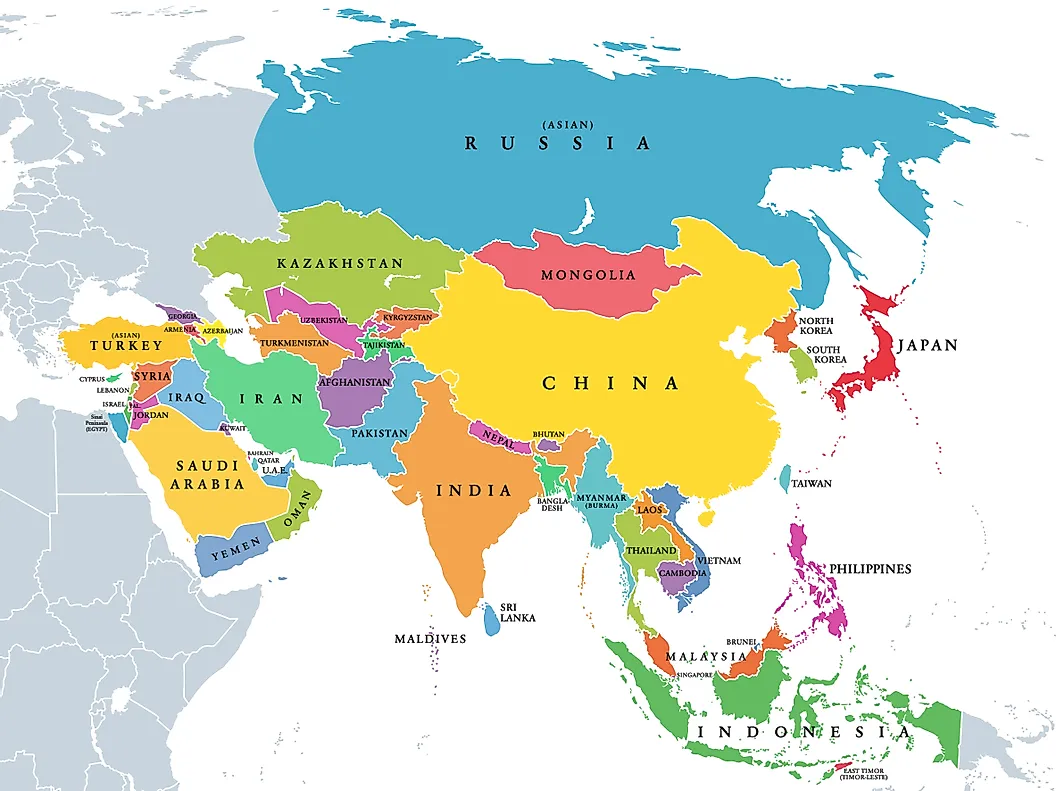

## Introduction
In order to see and evaluate the impact of covid 19 in 2020 to 2021 to 10 asia country. We create a project to answer 4 main question.
 - 1.Situation in 2020 - 2021 in Viet Nam
 - 2.Situation in 2020 - 2021 in 10 countries
 - 3.From 2020 to 2021 what country had fastest spread speed
 - 4.From 2020 to 2021 death situation in 10 countries

In [20]:
# datasets handler
import numpy as np
import pandas as pd
from collections import Counter

# visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# make plots
import matplotlib.pyplot as plt
import seaborn as sb

import requests
from io import StringIO

from datetime import datetime

# to ignore warnings
# import warnings

In [21]:
url = 'https://github.com/NLkhuyen/Udacity-Data-Science-Blog-Post/blob/main/timelines_10_countries_en_converted.csv?raw=true'
df = pd.read_csv(url,index_col=0)
print(df.head(5))

          Location        Date  Total cases  New cases  Total deaths  \
iso_code                                                               
KHM       Cambodia  2020/01/27          1.0        1.0           NaN   
KHM       Cambodia  2020/01/28          1.0        0.0           NaN   
KHM       Cambodia  2020/01/29          1.0        0.0           NaN   
KHM       Cambodia  2020/01/30          1.0        0.0           NaN   
KHM       Cambodia  2020/01/31          1.0        0.0           NaN   

          New deaths  Total tests  Total vaccinations  
iso_code                                               
KHM              NaN          NaN                 NaN  
KHM              NaN          NaN                 NaN  
KHM              NaN          NaN                 NaN  
KHM              NaN          NaN                 NaN  
KHM              NaN          NaN                 NaN  


In [29]:
def get_filtered_data(df, column_filter, value):
    ''' Filter a dataframe by column value.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    df_copy = df_copy[df_copy[column_filter] == value]
        
    return df_copy

In [30]:
def get_data_base_on_month(df, column_filter, value, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    newArray = []
    
    # filtered Location by Vietnam
    for column in columns:
        df_copy = df_copy[df_copy[column_filter] == value].dropna(subset=[column])
        
    # convert string to date
    for index, row in df_copy.iterrows():
        try:
            dt = datetime.strptime(row['Date'], '%Y/%m/%d')
        except ValueError:
            dt = datetime.strptime(row['Date'], '%m-%d-%Y')
        row['Date'] = dt
        newArray.append(row)
    # convert 2D array to dataframe
    df_copy = pd.DataFrame(newArray)
        
    # create max date to groupe
    df_copy['max-date'] = (
        df_copy.groupby([df_copy['Date'].dt.year, df_copy['Date'].dt.month])['Date'].transform('max'))
    
    # grouped column
    df_copy = df_copy[df_copy['Date'] == df_copy['max-date']]
        
    return df_copy

# Filter the dataframe by Vietnam and selecting datas by month.
caseBaseOnMonthArrayFiltered = get_data_base_on_month(df, 'Location', 'Vietnam', ['Location', 'Date', 'Total cases', 'New cases', 'Total tests'])

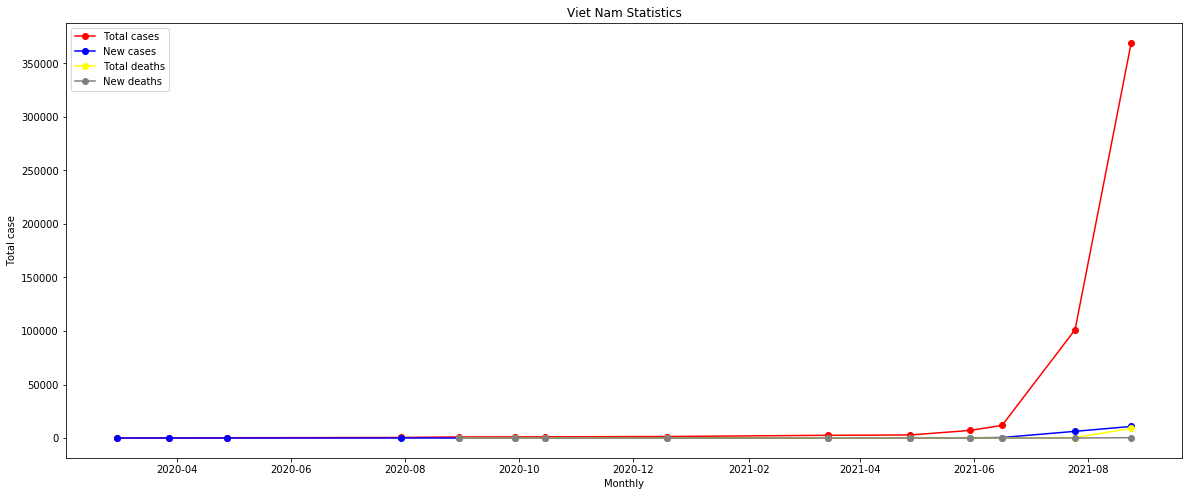

In [31]:
plt.figure(figsize=(20,8))
plt.plot(caseBaseOnMonthArrayFiltered['Date'], caseBaseOnMonthArrayFiltered['Total cases'], color='red', marker='o', label = "Total cases")
plt.plot(caseBaseOnMonthArrayFiltered['Date'], caseBaseOnMonthArrayFiltered['New cases'], color='blue', marker='o', label = "New cases")
plt.plot(caseBaseOnMonthArrayFiltered['Date'], caseBaseOnMonthArrayFiltered['Total deaths'], color='yellow', marker='o', label = "Total deaths")
plt.plot(caseBaseOnMonthArrayFiltered['Date'], caseBaseOnMonthArrayFiltered['New deaths'], color='grey', marker='o', label = "New deaths")
plt.title('Viet Nam Statistics')
plt.xlabel('Monthly')
plt.ylabel('Total case')
plt.legend()
plt.show()

In [32]:
def get_data_base_on_year(df):
    ''' Group a dataframe by date.,
        returns grouped dataframe.
    '''
    
    df_copy = df
    newArray = []
        
    # convert string to date
    for index, row in df_copy.iterrows():
        try:
            dt = datetime.strptime(row['Date'], '%Y/%m/%d')
        except ValueError:
            dt = datetime.strptime(row['Date'], '%m-%d-%Y')
        row['Date'] = dt
        newArray.append(row)
    
    # convert 2D array to dataframe
    df_copy = pd.DataFrame(newArray)
    
    # create max date to groupe
    df_copy['max-date'] = (
        df_copy.groupby([df_copy['Date'].dt.year])['Date'].transform('max'))
    
    df_copy = df_copy[df_copy['Date'] == df_copy['max-date']]
    
    # set year column to draw chart by year
    df_copy['year'] = df_copy['Date'].dt.year
        
    return df_copy

# get final data by date yearly in 10 coutries
dataInAllCountry = get_data_base_on_year(df)

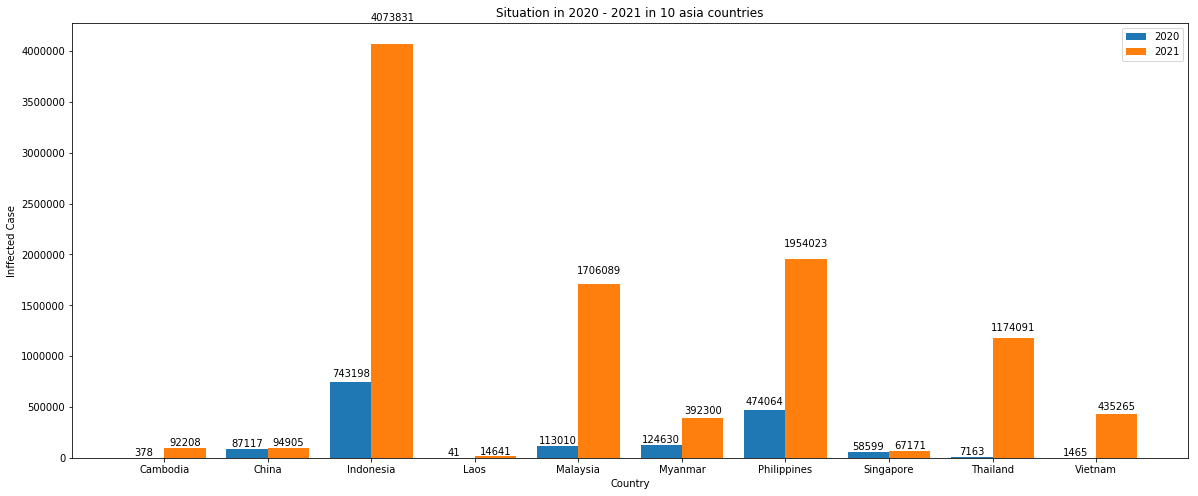

In [33]:
def autolabel(rects):
    # Create number label
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# get data by year
data_2021 = dataInAllCountry[dataInAllCountry['year'] == dataInAllCountry['year'].max()]
data_2020 = dataInAllCountry[dataInAllCountry['year'] == dataInAllCountry['year'].min()]

plt.figure(figsize=(20,8))

ind = np.arange(len(data_2020['Location']))
width = 0.4

# draw chart
bar1 = plt.bar(ind, data_2020['Total cases'], width, label = '2020')
bar2 = plt.bar(ind + width, data_2021['Total cases'], width, label = '2021')
plt.xticks(ind+width/2,data_2020['Location'])
plt.title('Situation in 2020 - 2021 in 10 asia countries')
plt.xlabel('Country')
plt.ylabel('Inffected Case')
plt.legend( (bar1, bar2), ('2020', '2021') )
autolabel(bar1)
autolabel(bar2)
plt.show()

In [34]:
def get_data_all_country_base_on_month(df):
    ''' Filter a dataframe by country, groupe by date.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    newArray = []
        
    for index, row in df_copy.iterrows():
        try:
            dt = datetime.strptime(row['Date'], '%Y/%m/%d')
        except ValueError:
            dt = datetime.strptime(row['Date'], '%m-%d-%Y')
        row['Date'] = dt
        newArray.append(row)
        
    df_copy = pd.DataFrame(newArray)
        
    df_copy['max-date'] = (
        df_copy.groupby([df_copy['Date'].dt.year, df_copy['Date'].dt.month])['Date'].transform('max'))
    
    df_copy = df_copy[df_copy['Date'] == df_copy['max-date']]
    
    return df_copy

# Filter the dataframe by countries and selecting datas by month.
countriesBaseOnMonthArrayFiltered = get_data_all_country_base_on_month(df)

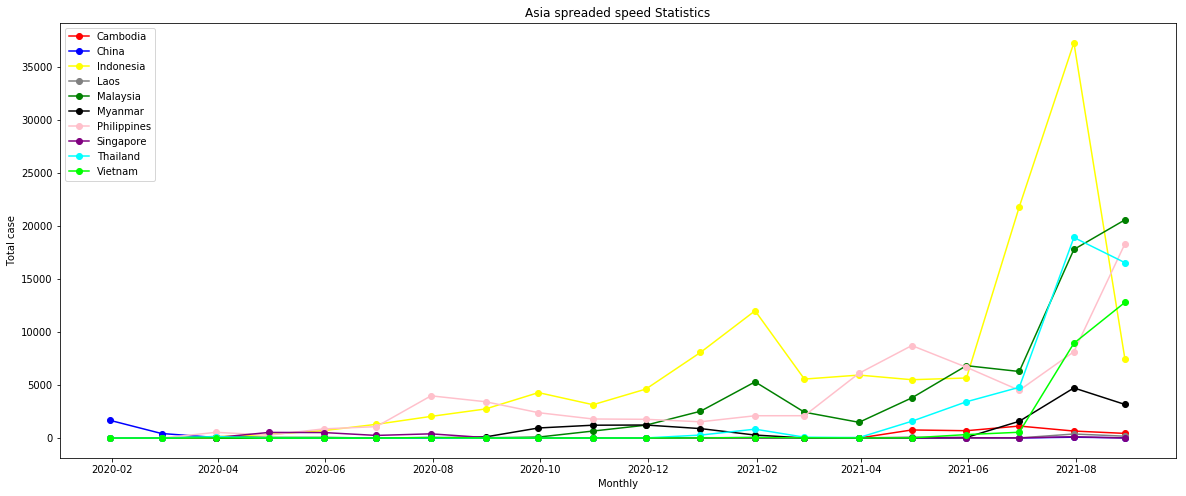

In [37]:
# set dataframe by countries
cambodia_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Cambodia')
china_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'China')
indonesia_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Indonesia')
laos_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Laos')
malaysia_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Malaysia')
myanmar_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Myanmar')
philippines_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Philippines')
singapore_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Singapore')
thailand_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Thailand')
vietnam_data_frame = get_filtered_data(countriesBaseOnMonthArrayFiltered, 'Location', 'Vietnam')

# draw chart
plt.figure(figsize=(20,8))
plt.plot(cambodia_data_frame['Date'], cambodia_data_frame['New cases'], color='red', marker='o', label = "Cambodia")
plt.plot(china_data_frame['Date'], china_data_frame['New cases'], color='blue', marker='o', label = "China")
plt.plot(indonesia_data_frame['Date'], indonesia_data_frame['New cases'], color='yellow', marker='o', label = "Indonesia")
plt.plot(laos_data_frame['Date'], laos_data_frame['New cases'], color='grey', marker='o', label = "Laos")
plt.plot(malaysia_data_frame['Date'], malaysia_data_frame['New cases'], color='green', marker='o', label = "Malaysia")
plt.plot(myanmar_data_frame['Date'], myanmar_data_frame['New cases'], color='black', marker='o', label = "Myanmar")
plt.plot(philippines_data_frame['Date'], philippines_data_frame['New cases'], color='pink', marker='o', label = "Philippines")
plt.plot(singapore_data_frame['Date'], singapore_data_frame['New cases'], color='purple', marker='o', label = "Singapore")
plt.plot(thailand_data_frame['Date'], thailand_data_frame['New cases'], color='aqua', marker='o', label = "Thailand")
plt.plot(vietnam_data_frame['Date'], vietnam_data_frame['New cases'], color='lime', marker='o', label = "Vietnam")
plt.title('Asia spreaded speed Statistics')
plt.xlabel('Monthly')
plt.ylabel('Total case')
plt.legend()
plt.show()

In [44]:
def get_data_all_country_death_rate(df):
    ''' Filter a dataframe by country, date, and create death rate column.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    newArray = []
        
    for index, row in df_copy.iterrows():
        row['death-rate'] = (row['Total deaths'] / row['Total cases'])*100
        try:
            dt = datetime.strptime(row['Date'], '%Y/%m/%d')
        except ValueError:
            dt = datetime.strptime(row['Date'], '%m-%d-%Y')
        row['Date'] = dt
        newArray.append(row)
        #print(row)
        
    df_copy = pd.DataFrame(newArray)
        
    df_copy['max-date'] = (
        df_copy.groupby([df_copy['Date'].dt.year, df_copy['Date'].dt.month])['Date'].transform('max'))
    
    df_copy = df_copy[df_copy['Date'] == df_copy['max-date']]
    #print(df_copy)
    
    return df_copy

# Filter the dataframe by countries and selecting datas by month.
countriesRateBaseOnMonthArrayFiltered = get_data_all_country_death_rate(df)

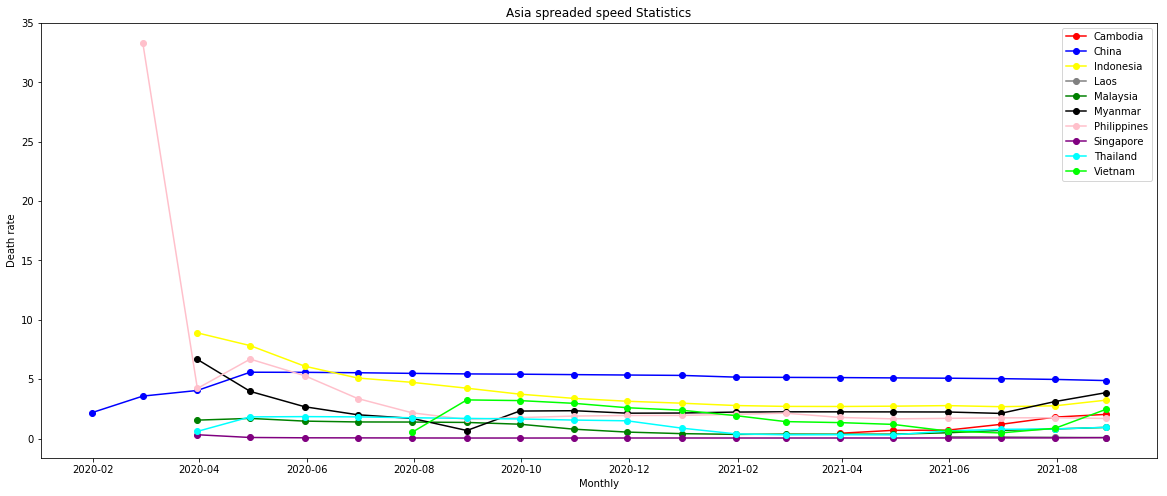

In [45]:
# get data by countries
cambodia_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Cambodia')
china_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'China')
indonesia_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Indonesia')
laos_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Laos')
malaysia_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Malaysia')
myanmar_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Myanmar')
philippines_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Philippines')
singapore_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Singapore')
thailand_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Thailand')
vietnam_data_frame = get_filtered_data(countriesRateBaseOnMonthArrayFiltered, 'Location', 'Vietnam')

# draw chart
plt.figure(figsize=(20,8))
plt.plot(cambodia_data_frame['Date'], cambodia_data_frame['death-rate'], color='red', marker='o', label = "Cambodia")
plt.plot(china_data_frame['Date'], china_data_frame['death-rate'], color='blue', marker='o', label = "China")
plt.plot(indonesia_data_frame['Date'], indonesia_data_frame['death-rate'], color='yellow', marker='o', label = "Indonesia")
plt.plot(laos_data_frame['Date'], laos_data_frame['death-rate'], color='grey', marker='o', label = "Laos")
plt.plot(malaysia_data_frame['Date'], malaysia_data_frame['death-rate'], color='green', marker='o', label = "Malaysia")
plt.plot(myanmar_data_frame['Date'], myanmar_data_frame['death-rate'], color='black', marker='o', label = "Myanmar")
plt.plot(philippines_data_frame['Date'], philippines_data_frame['death-rate'], color='pink', marker='o', label = "Philippines")
plt.plot(singapore_data_frame['Date'], singapore_data_frame['death-rate'], color='purple', marker='o', label = "Singapore")
plt.plot(thailand_data_frame['Date'], thailand_data_frame['death-rate'], color='aqua', marker='o', label = "Thailand")
plt.plot(vietnam_data_frame['Date'], vietnam_data_frame['death-rate'], color='lime', marker='o', label = "Vietnam")
plt.title('Asia spreaded speed Statistics')
plt.xlabel('Monthly')
plt.ylabel('Death rate')
plt.legend()
plt.show()

## Conclusion
In this article, we take a look at how Covid effect 10 asia in 2020-2021. At very first time, the effect was worst, but when goverment start to reponse, everything seem to selte down.
